In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions as pdr

In [2]:
df=pd.read_csv('placement.csv')
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [3]:
df.shape

(100, 3)

<AxesSubplot:xlabel='cgpa', ylabel='resume_score'>

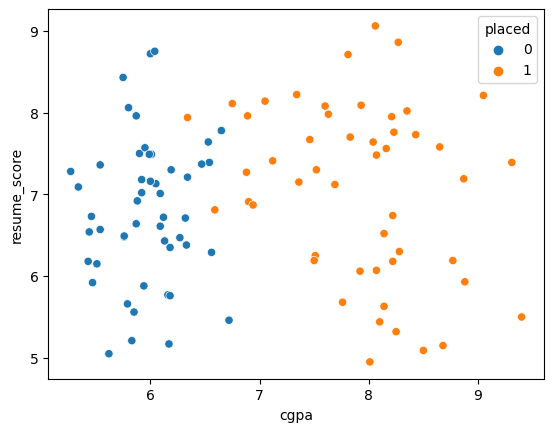

In [4]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [5]:
x=df.iloc[:,0:2]   # x=df.drop('placed',axis=1)
x.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [6]:
y=df.iloc[:,2]     # y=df['placed']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: placed, dtype: int64

In [7]:
p=Perceptron()
p.fit(x,y)

Perceptron()

In [8]:
p.coef_   #   we are getting values of weight of features i.e. cgpa=40 and resume_score= -36

array([[ 40.26, -36.  ]])

In [9]:
p.intercept_    # bias b= -25

array([-25.])

In [10]:
from mlxtend.plotting import plot_decision_regions as pdr

C:\Users\jainh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

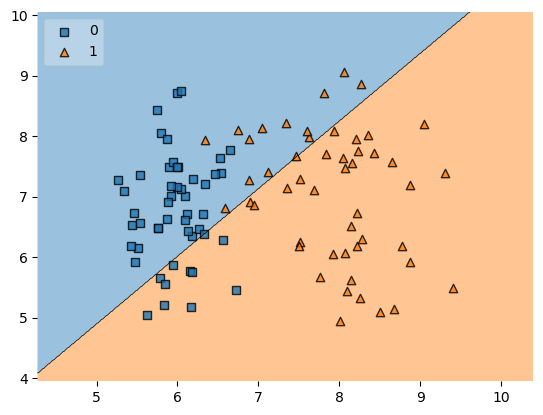

In [11]:
pdr(x.values,y.values,clf=p,legend=2)

# PERCEPTRON TRICS i.e. How to Train Perceptron (weights and bias)

Prepare data set using sklearn liblary

In [12]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [13]:
X[:5] # in array we cant use ---------- head() ----------------------   do slicing

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163]])

In [14]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


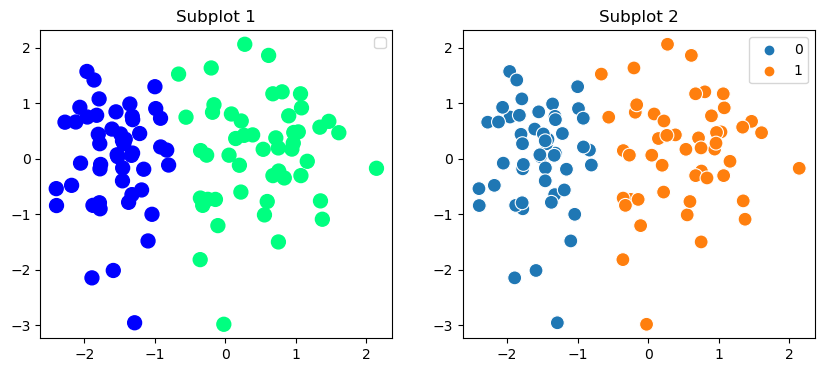

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap='winter',s=100)    # X= X[:,0] and y= X[:,1]  
plt.title('Subplot 1')
plt.legend()
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,cmap='winter',s=100)
plt.title('Subplot 2')
plt.legend()

In [16]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)   # for bias term we add 1 to every row like  before that [ 0.19924745, -0.11697552]
                                                                            # right now [1, 0.19924745, -0.11697552]
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [17]:
def step(z):
    return 1 if z>0 else 0      # here we are saying z>0 return 1 else return 0 

In [18]:
intercept_,coef_ = perceptron(X,y)

In [19]:
print(coef_)
print(intercept_)

[1.29456755 0.15341455]
1.0


In [20]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [21]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

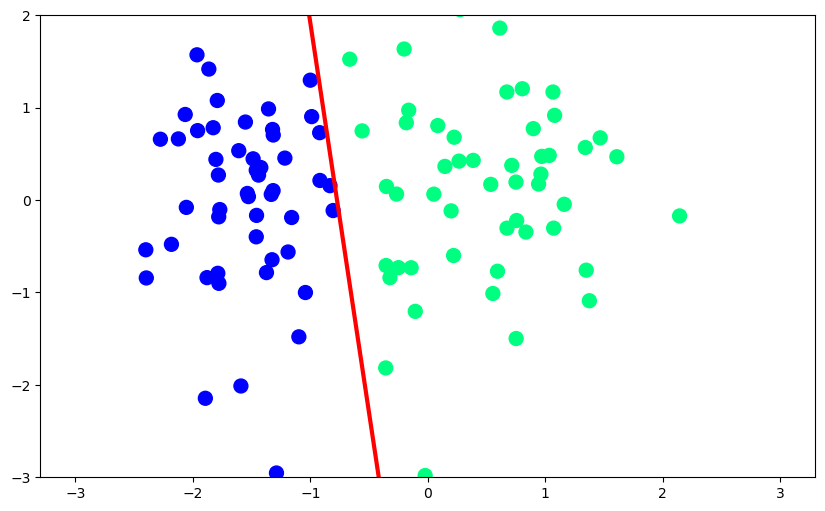

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [23]:
# def perceptron(X,y):
#     m=[]
#     b=[]
#     X = np.insert(X,0,1,axis=1)
#     weights = np.ones(X.shape[1])
#     lr = 0.1
#     for i in range(200):
#         j = np.random.randint(0,100)
#         y_hat = step(np.dot(X[j],weights))
#         weights = weights + lr*(y[j]-y_hat)*X[j]
#         m.append(-(weights[1]/weights[2]))
#         b.append(-(weights[0]/weights[2]))
#     return m,b

In [24]:
# m,b=perceptron(X,y)

In [25]:
# %matplotlib notebook
# from matplotlib.animation import FuncAnimation
# import matplotlib.animation as animation

In [26]:
# fig, ax=plt.subplots(figsize=(9,5))
# x_i=np.arange(-3,3,0.1)
# y_i=x_i*m[0]+b[0]
# ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# line = ax.plot(x_i,x_i*m[0]+b[0],'r-',linewidth=2)
# plt.ylim(-3,3)
# def update(i):
#     label='epoch{0}'.format(i,+ 1)
#     line.set_ydata(x_i*m[i]+b[i])
#     ax.set_xlabel(label)           # return line ax
# anim= FuncAnimation(fig,update,repeat=True,frames=200,interval=100)    

# PERCEPTRONE LOSS FUNCTION

In [27]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [28]:
X[:5]

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163]])

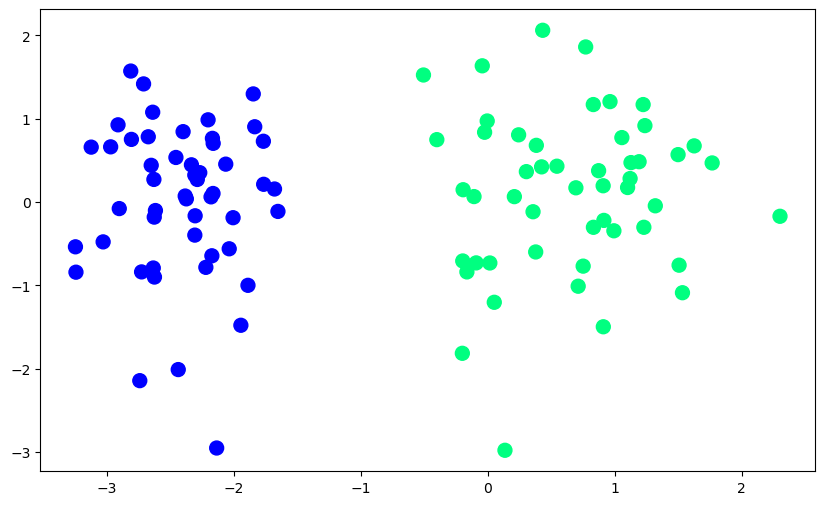

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [30]:
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b

In [31]:
w1,w2,b = perceptron(X,y)

In [32]:
b

1.3000000000000003

In [33]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

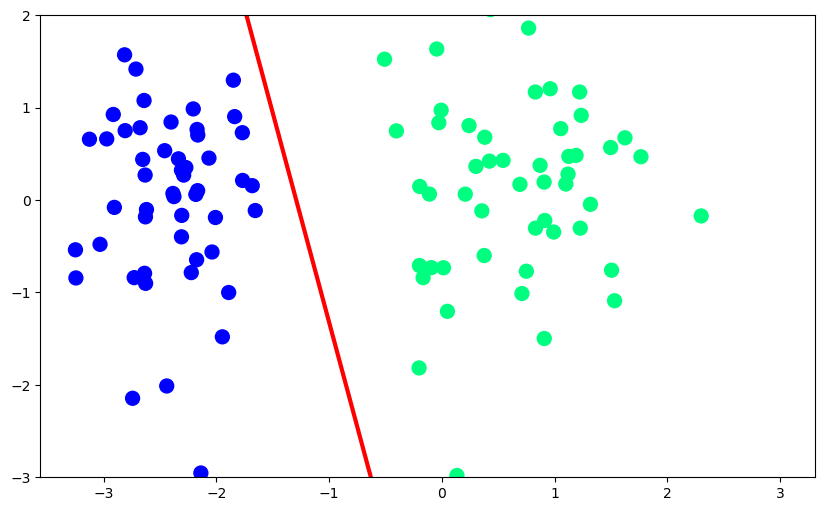

In [34]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# PROBLEM WITH PERCEPTRONE

In [ ]:
# only work on linear data not work on non linear data

In [35]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [36]:
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

In [37]:
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

In [38]:
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [39]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input1', ylabel='input2'>

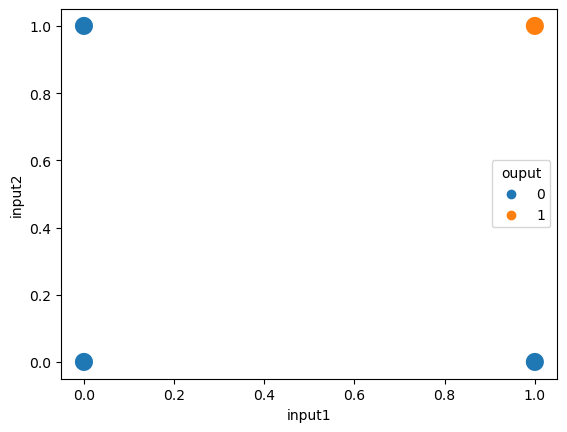

In [42]:
sns.scatterplot(and_data['input1'],and_data['input2'],hue=and_data['ouput'],s=200)

In [43]:
or_data

,input1,input2,ouput
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input1', ylabel='input2'>

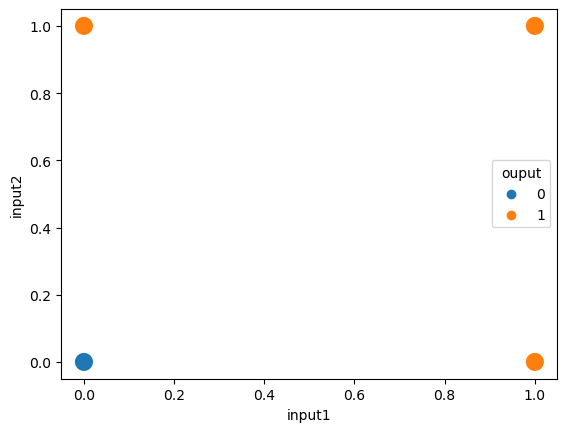

In [44]:
sns.scatterplot(or_data['input1'],or_data['input2'],hue=or_data['ouput'],s=200)

In [45]:
xor_data

,input1,input2,ouput
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input1', ylabel='input2'>

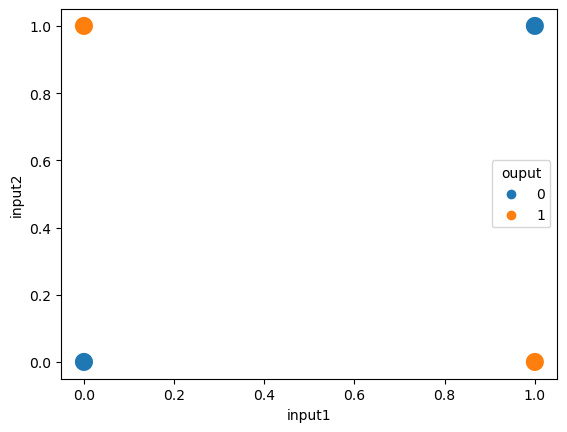

In [46]:
sns.scatterplot(xor_data['input1'],xor_data['input2'],hue=xor_data['ouput'],s=200)

In [47]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [48]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [49]:
clf1.coef_

array([[2., 2.]])

In [50]:
clf1.intercept_

array([-2.])

In [51]:
x=np.linspace(-1,1,5)
y=-x+1

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input1', ylabel='input2'>

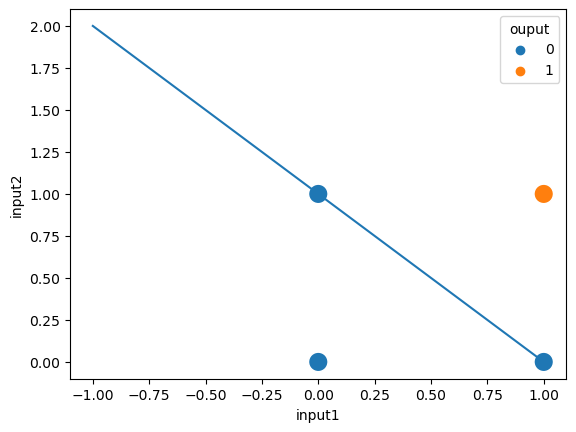

In [52]:
plt.plot(x,y)
sns.scatterplot(and_data['input1'],and_data['input2'],hue=and_data['ouput'],s=200)

In [53]:
clf2.coef_

array([[2., 2.]])

In [54]:
clf2.intercept_

array([-1.])

In [55]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input1', ylabel='input2'>

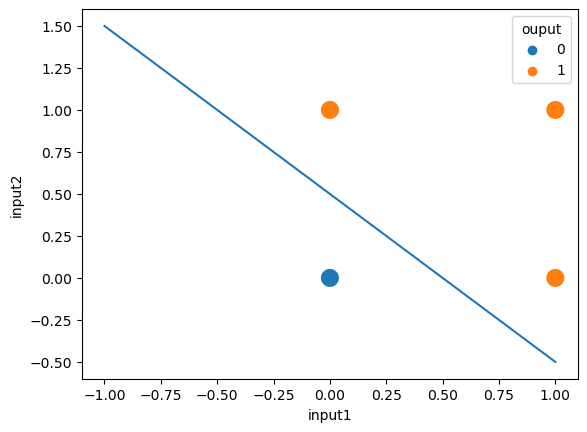

In [56]:
plt.plot(x1,y1)
sns.scatterplot(or_data['input1'],or_data['input2'],hue=or_data['ouput'],s=200)

In [57]:
clf3.coef_

array([[0., 0.]])

In [58]:
clf3.intercept_

array([0.])

C:\Users\jainh\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

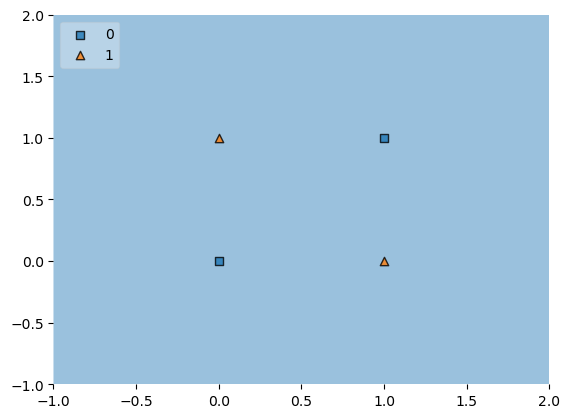

In [63]:
from mlxtend.plotting import plot_decision_regions as pdr
pdr(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values, clf=clf3, legend=2)

In [64]:
# Tensorflow Playground - https://playground.tensorflow.org/